# Example code: Significance of ACF and PACF Plots In Time Series Analysis
The code below was extrated from the article [Significance of ACF and PACF Plots In Time Series Analysis](https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8), some comments were added to complement the analysis. This article is for folks who want to know the intuition behind determining the order of auto-regressive (AR) and moving average (MA) series using ACF and PACF plots.

The following code defines a simple AR process and found its order using the PACF plot. 
* We should expect our AR process to show gradual decrease in the ACF plot since being an AR process its present has good correlation with the past lags. 
* We expect PACF to have sharp fall after near lags as these lags near to present can capture the variation so well that we don’t need past lags to predict present.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

import matplotlib
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40) 

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
from statsmodels.tsa.stattools import acf, pacf

## Auto regressive (AR) process
A time series is said to be AR when present value of the time series can be obtained using previous values of the same time series i.e the present value is weighted average of its past values.

In [2]:
t = np.linspace(0, 10, 500)
#normal distributed values
ys = np.random.normal(0,5,500)

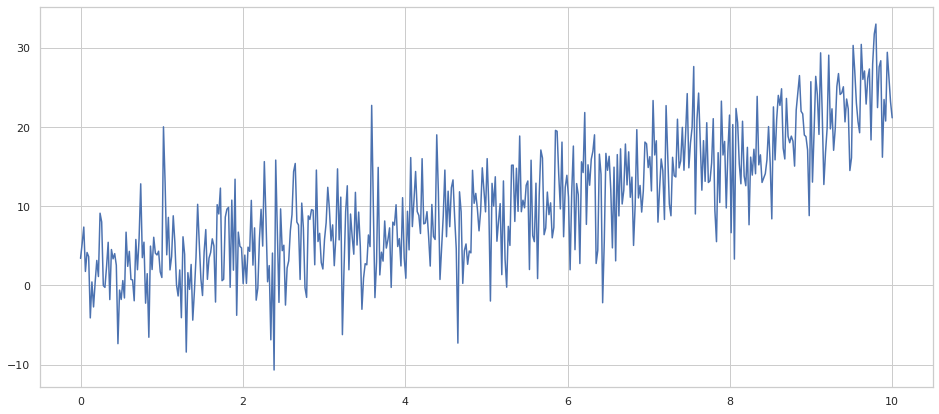

In [3]:
#exponential series to get the trend
ye = np.exp(t**0.5)
#adding normally distributed series in exponential series
y = ys+ye
#plot
plt.figure(figsize=(16,7))
plt.plot(t,y)

### ACF - AutoCorrelation Function
ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values.

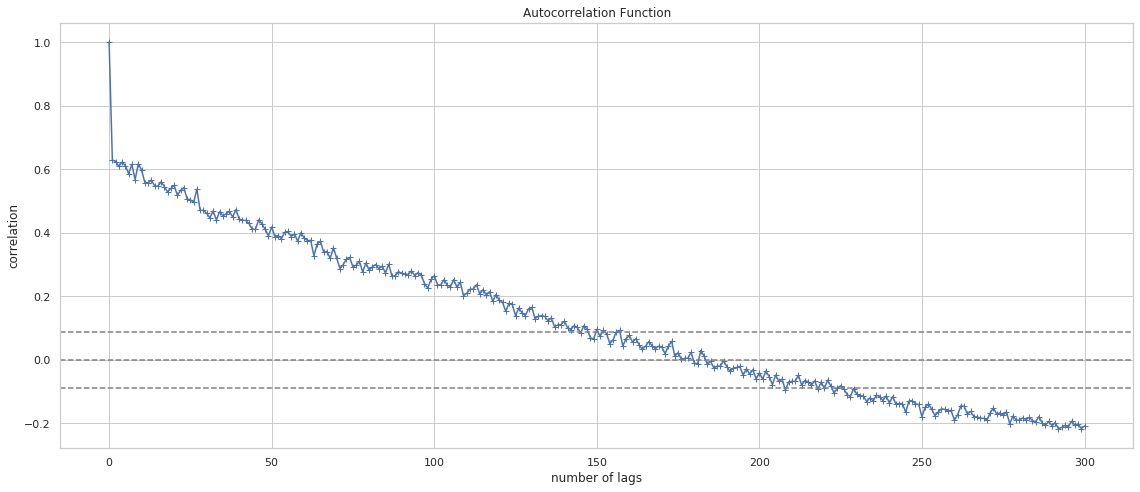

In [5]:
#calling auto correlation function
lag_acf = acf(y, nlags=300, fft=False)
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_acf,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

In the above correlation plot dotted lines represent the confidence band, with center dotted line represents mean and upper and lower dotted line represent boundries based on 95% confidence interval.
Notice that we have good positive correlation with the lags upto 150, this is the point where ACF plot cuts the upper confidence threshold. Although we have good correlation upto 150th lag we cannot use all of them as it will create multi-collinearity problem, thats why we turn to PACF plot to get only the most relevant lags!

### PACF - Partial AutoCorrelation Function
PACF is a partial auto-correlation function. Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals (which remains after removing the effects which are already explained by the earlier lag(s)) with the next lag value hence ‘partial’ and not ‘complete’ as we remove already found variations before we find the next correlation.

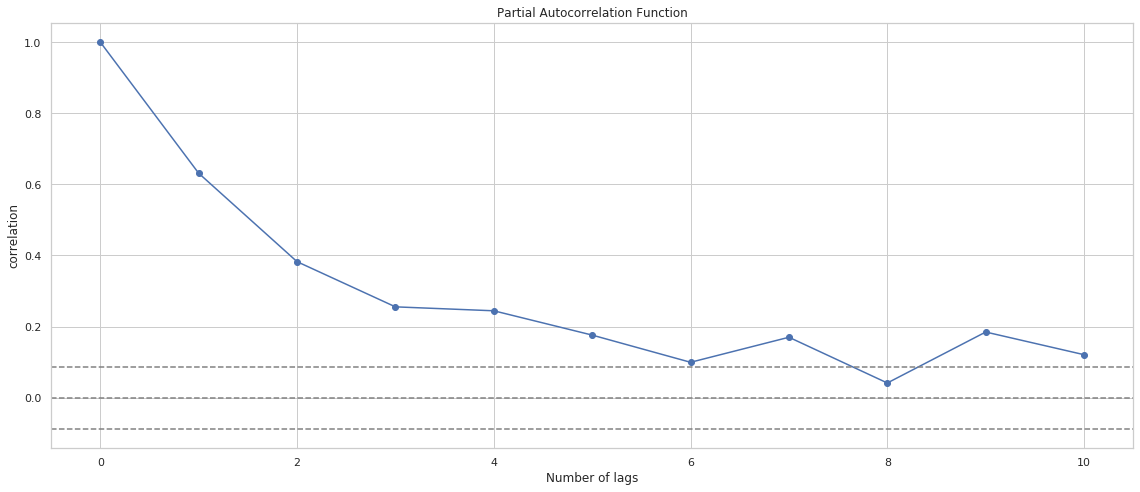

In [16]:
#calling partial correlation function
lag_pacf = pacf(y, nlags=10, method='ols')
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_pacf,marker='o')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('Number of lags')
plt.ylabel('correlation')
plt.tight_layout()

In [23]:
print('Upper confidence interval: {0}'.format(1.96/np.sqrt(len(y))))

Upper confidence interval: 0.08765386471799175


In [17]:
lag_pacf

array([1.        , 0.6313674 , 0.38266073, 0.25562214, 0.24456031,
       0.17621438, 0.0997556 , 0.1701382 , 0.0415771 , 0.18484814,
       0.12109367])


In the above plot we can see that lags upto 7 have good correlation before the plot first cuts the upper confidence interval. This is our p value i.e the order of our AR process. We can model given AR process using linear combination of first 7 lags.

## Moving average (MA) process
A process where the present value of series is defined as a linear combination of past errors. We assume the errors to be independently distributed with the normal distribution.

In [7]:
#xma = np.random.randint(1,50000,100)
xma = np.random.normal(0,25,1000)

In [10]:
#lets create a MA series having mean 2 and of order 2
y5 = 2 + xma + 0.8*np.roll(xma,-1) + 0.6*np.roll(xma,-2) #+ 0.6 *np.roll(xma,-3)

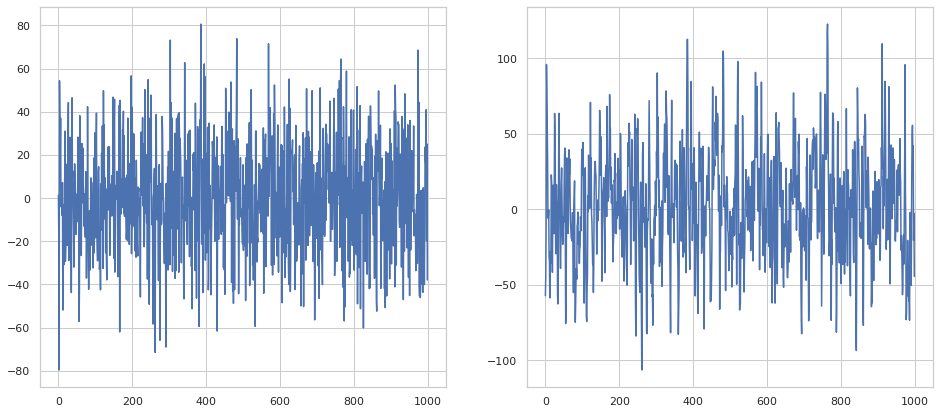

In [9]:
plt.figure(figsize=(16, 7))
#Plot ACF: 
plt.subplot(121) 
plt.plot(xma)
plt.subplot(122)
plt.plot(y5)

### ACF - AutoCorrelation Function


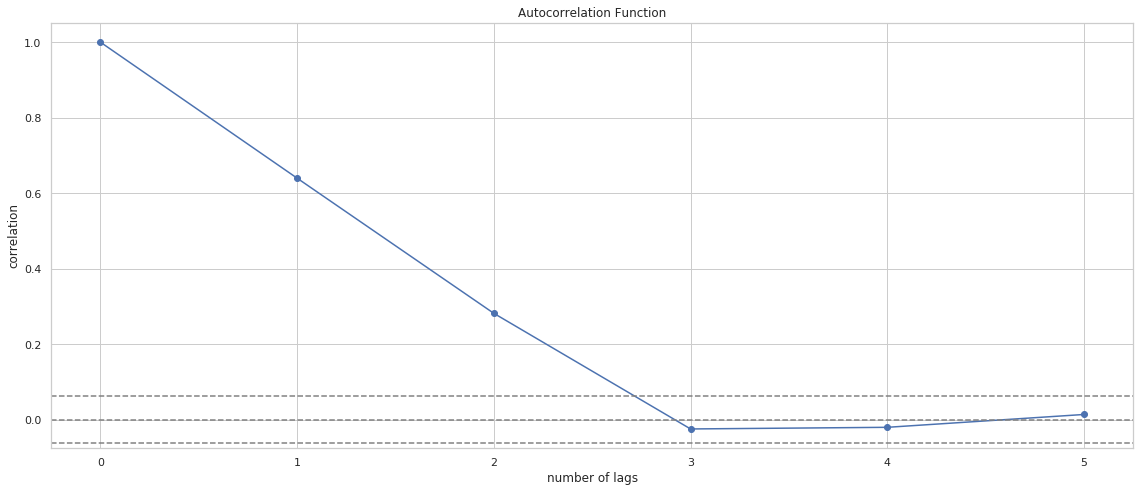

In [20]:
#calling acf function from stattools
lag_acf = acf(y5, nlags=5, fft=False)
plt.figure(figsize=(16, 7))
#Plot ACF: 
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y5)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y5)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

In [19]:
1.96/np.sqrt(len(y5))

0.061980642139300234

In [14]:
lag_acf

array([ 1.        ,  0.63996002,  0.28213055, -0.02393295, -0.01958298,
        0.01440783,  0.03482354,  0.04034809,  0.02248341, -0.0290905 ,
       -0.06059639, -0.07559541, -0.02343136,  0.00884276,  0.0334264 ,
        0.00480612, -0.00567116,  0.01407723,  0.0386068 ,  0.05780416,
        0.06088025,  0.05249679,  0.0555842 ,  0.01371026,  0.01249924,
       -0.01675954, -0.01503366, -0.0386149 , -0.01840317,  0.00922616,
       -0.00416765, -0.03760141, -0.04434471, -0.01377571,  0.00660543,
       -0.02069711, -0.03955289, -0.06166773, -0.01832629, -0.0079669 ,
        0.01182046, -0.01376208, -0.01354377, -0.05272758, -0.06560397,
       -0.10114287, -0.06205535, -0.02966353,  0.02864465,  0.01538333,
       -0.00989044])

As per above plot we have good correlation upto 2nd lag, this is the lag after which plot cuts the upper confidence interval. Order q of series obtained by the plot is 2, which is correct as we had defined our series with linear combination of residuals upto lag 2.
Thus this proves that ACF correctly predicted order of our MA series.

### PACF - Partial AutoCorrelation Function

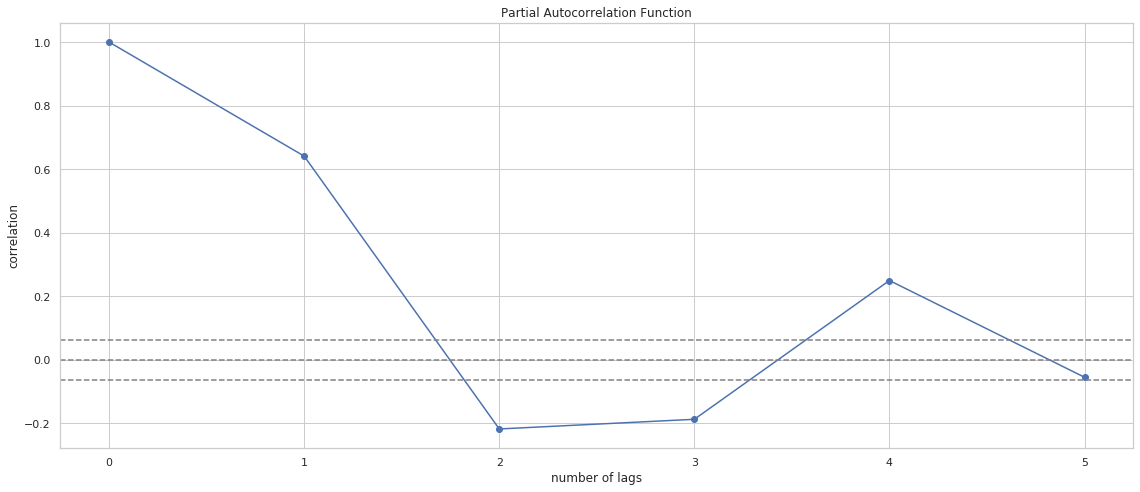

In [21]:
#calling pacf function from stattool
lag_pacf = pacf(y5, nlags=5, method='ols')

#PLOT PACF
plt.figure(figsize=(16, 7))
plt.plot(lag_pacf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y5)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(y5)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

If we see PACF plot there are many instances where correlation is above upper confidence band as PACF calculates correlations of lags of time series with residuals and our series itself is linear combination of residual and its lagged values.Hence we can get good correlation for near as well as past lags.